Doing all the necessary imports and launching a new web driver with Chrome. This notebook uses a combination of Selenium and Beautiful Soup

In [1]:
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import Select
from webdriver_manager.chrome import ChromeDriverManager
import time
import pandas as pd
pd.set_option("display.max_colwidth", None)

/Users/areena.arora/.pyenv/versions/3.10.0/lib/python3.10/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
driver = webdriver.Chrome(ChromeDriverManager().install())



====== WebDriver manager ======
Current google-chrome version is 98.0.4758
Get LATEST chromedriver version for 98.0.4758 google-chrome
Driver [/Users/areena.arora/.wdm/drivers/chromedriver/mac64/98.0.4758.80/chromedriver] found in cache
/var/folders/81/2s24wkdd02j9528vnjsx7m080000gn/T/ipykernel_16075/1503906442.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


This is to scroll through the dynamically loading page

In [3]:
def get_biryani_restaurants(city):
    link = "https://www.zomato.com/" + city + "/restaurants/biryani"
    driver.get(link)
    current_height = driver.execute_script('return document.body.scrollHeight')
    while True:
        # Scroll to the bottom, wait for a couple seconds
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight - 3000)")
        time.sleep(10)

        # If it loaded new content, the height should have changed
        prev_height = current_height
        current_height = driver.execute_script('return document.body.scrollHeight')
        if prev_height == current_height:
            print("Height didn't change, end of page, exiting")
            break
        else:
            print("New page height is", current_height, "continuing to try to scroll")
        
    all_restaurants = []
    
    html = driver.page_source
    city_soup = BeautifulSoup(html)

    restaurants_details = city_soup.find_all('h4')

    for each_restaurant_name in restaurants_details:
        each_restaurant_dict = {}
        each_restaurant_dict['name'] = each_restaurant_name.string
        try:
            rating = each_restaurant_name.find_next_sibling().div.div.div.div.div.string
        except:
            rating = "Not available"
        each_restaurant_dict['rating'] = rating
        try:
            price = each_restaurant_name.parent.find_next_sibling().find_all('p')[1].string
        except:
            price = "Range not given"
        each_restaurant_dict['price'] = price
        each_restaurant_dict['city'] = city
        all_restaurants.append(each_restaurant_dict)
    return all_restaurants

In [4]:
master_cities_list = []

cities = ['ncr','mumbai', 'hyderabad', 'lucknow', 'kolkata', 'bangalore']

for each_city in cities:
    restaurants = get_biryani_restaurants(each_city)
    master_cities_list.extend(restaurants)

New page height is 5694 continuing to try to scroll
New page height is 7440 continuing to try to scroll
New page height is 9185 continuing to try to scroll
New page height is 10931 continuing to try to scroll
New page height is 12676 continuing to try to scroll
New page height is 14422 continuing to try to scroll
New page height is 15388 continuing to try to scroll
New page height is 15460 continuing to try to scroll
Height didn't change, end of page, exiting
New page height is 5662 continuing to try to scroll
New page height is 7408 continuing to try to scroll
New page height is 9154 continuing to try to scroll
New page height is 10899 continuing to try to scroll
New page height is 12645 continuing to try to scroll
New page height is 14390 continuing to try to scroll
New page height is 15793 continuing to try to scroll
Height didn't change, end of page, exiting
New page height is 5703 continuing to try to scroll
New page height is 7449 continuing to try to scroll
New page height is 91

In [92]:
df = pd.DataFrame(master_cities_list)
df

,name,rating,price,city
0,Moti Mahal Delux,3.8,₹300 for one,ncr
1,Gulati,4.3,₹300 for one,ncr
2,Veg Gulati,4.0,₹300 for one,ncr
3,Bikkgane Biryani,3.9,₹300 for one,ncr
4,Paradise Muradabadi Chicken Biryani,4.1,₹300 for one,ncr
5,Dhaba On Wheels,3.1,₹300 for one,ncr
6,Mr Naan Mrs Curry,3.4,₹300 for one,ncr
7,Irshad Hussain Dhaba,4.0,₹300 for one,ncr
8,Zaika Muradabadi Chicken Biryani,3.5,₹300 for one,ncr
9,Best In Town,-,₹250 for one,ncr


In [93]:
df.price.value_counts()

₹100 for one       142
₹200 for one        98
₹150 for one        84
₹250 for one        81
₹300 for one        56
₹400 for one        36
₹350 for one        21
₹500 for one        12
₹50 for one          9
Range not given      6
Name: price, dtype: int64

In [94]:
df["price"] = df["price"].str.replace(" for one", "")
df["price"] = df["price"].str.replace("Range not given", "0")
df["price"] = df["price"].str.replace("₹", "")

In [95]:
df.dtypes

name      object
rating    object
price     object
city      object
dtype: object

In [98]:
df = df.astype({'price': 'float'})
df.dtypes

name       object
rating     object
price     float64
city       object
dtype: object

In [97]:
df.price.value_counts()

100.0    142
200.0     98
150.0     84
250.0     81
300.0     56
400.0     36
350.0     21
500.0     12
50.0       9
0.0        6
Name: price, dtype: int64

In [99]:
df.rating.value_counts()

4.0              100
-                 96
3.9               53
4.1               50
3.8               45
4.3               29
3.7               28
4.2               28
3.6               27
3.5               22
3.4               14
3.2               13
3.3               10
3.1                8
Not available      6
New                5
4.5                3
4.4                3
3.0                2
2.6                1
2.9                1
2.7                1
Name: rating, dtype: int64

In [105]:
df["rating"] = df["rating"].str.replace("-", "0")
df["rating"] = df["rating"].str.replace("New", "0")
df["rating"] = df["rating"].str.replace("Not available", "0")
df = df.astype({'rating': 'float'})

In [106]:
pd.set_option("display.max_rows", None)
df

,name,rating,price,city
0,Moti Mahal Delux,3.8,300.0,ncr
1,Gulati,4.3,300.0,ncr
2,Veg Gulati,4.0,300.0,ncr
3,Bikkgane Biryani,3.9,300.0,ncr
4,Paradise Muradabadi Chicken Biryani,4.1,300.0,ncr
5,Dhaba On Wheels,3.1,300.0,ncr
6,Mr Naan Mrs Curry,3.4,300.0,ncr
7,Irshad Hussain Dhaba,4.0,300.0,ncr
8,Zaika Muradabadi Chicken Biryani,3.5,300.0,ncr
9,Best In Town,0.0,250.0,ncr


- Average prices
- Average ratings

- Number of places in each city
- Number of places in each city with rating above 4
- Number of places in each city with rating above 4 and price below 200

In [107]:
df.price.mean().round()

205.0

In [108]:
df.rating.mean().round()

3.0

In [109]:
df.city.value_counts()

bangalore    101
lucknow       99
mumbai        91
kolkata       91
ncr           87
hyderabad     76
Name: city, dtype: int64

In [112]:
df.groupby('city')['rating'].mean().sort_values(ascending=False)

city
kolkata      3.403297
hyderabad    3.376316
lucknow      3.177778
ncr          3.026437
mumbai       2.927473
bangalore    2.773267
Name: rating, dtype: float64

In [114]:
df.groupby('city')['price'].mean().round().sort_values(ascending=False)

city
ncr          291.0
mumbai       255.0
bangalore    223.0
hyderabad    195.0
lucknow      157.0
kolkata      112.0
Name: price, dtype: float64

In [117]:
df[df["rating"] >= 4.0].city.value_counts()

hyderabad    48
mumbai       38
bangalore    36
kolkata      34
lucknow      29
ncr          28
Name: city, dtype: int64

In [122]:
df[df["price"] > 400].city.value_counts()

ncr    12
Name: city, dtype: int64

In [123]:
df[df["price"] > 300].city.value_counts()

ncr          24
mumbai       21
hyderabad    12
bangalore    12
Name: city, dtype: int64

In [124]:
df[df["price"] > 200].city.value_counts()

ncr          69
bangalore    45
mumbai       42
hyderabad    37
lucknow      13
Name: city, dtype: int64

In [125]:
df[df["price"] < 100].city.value_counts()

kolkata      10
ncr           1
mumbai        1
hyderabad     1
lucknow       1
bangalore     1
Name: city, dtype: int64

In [127]:
df[df["price"] < 100]

,name,rating,price,city
86,None,0.0,0.0,ncr
177,None,0.0,0.0,mumbai
253,None,0.0,0.0,hyderabad
352,None,0.0,0.0,lucknow
434,Saif Fried Chicken,0.0,50.0,kolkata
435,Fusion,4.1,50.0,kolkata
436,Apu's Kitchen,4.1,50.0,kolkata
437,Rajshahi Restaurant,3.4,50.0,kolkata
438,New Paul Dhaba Veggie Hub,4.0,50.0,kolkata
439,Anokha Baghicha,3.8,50.0,kolkata


In [128]:
df.price.value_counts()

100.0    142
200.0     98
150.0     84
250.0     81
300.0     56
400.0     36
350.0     21
500.0     12
50.0       9
0.0        6
Name: price, dtype: int64

In [129]:
df[df["price"] < 100].rating.sort_values(ascending=False)

441    4.4
442    4.3
435    4.1
436    4.1
440    4.1
438    4.0
439    3.8
437    3.4
86     0.0
177    0.0
253    0.0
352    0.0
434    0.0
443    0.0
544    0.0
Name: rating, dtype: float64

In [130]:
df[df["price"] > 400]

,name,rating,price,city
69,Daryaganj - By The Inventors Of Butter Chicken And Dal Makhani,4.0,500.0,ncr
70,Abdul Ghani Qureshi Kabab Corner,4.2,500.0,ncr
71,Biryani Blues,4.1,500.0,ncr
72,Laale Di Chaap,3.2,500.0,ncr
73,Hyderabadi Biryani Bhawan,3.9,500.0,ncr
74,Rozi Roti,3.4,500.0,ncr
75,Thalassery Restaurant,3.4,500.0,ncr
76,Punjabi Grilled,3.9,500.0,ncr
77,The Southern Kitchen,3.9,500.0,ncr
78,Hello G Sas Kitchen,3.3,500.0,ncr


In [131]:
df

,name,rating,price,city
0,Moti Mahal Delux,3.8,300.0,ncr
1,Gulati,4.3,300.0,ncr
2,Veg Gulati,4.0,300.0,ncr
3,Bikkgane Biryani,3.9,300.0,ncr
4,Paradise Muradabadi Chicken Biryani,4.1,300.0,ncr
5,Dhaba On Wheels,3.1,300.0,ncr
6,Mr Naan Mrs Curry,3.4,300.0,ncr
7,Irshad Hussain Dhaba,4.0,300.0,ncr
8,Zaika Muradabadi Chicken Biryani,3.5,300.0,ncr
9,Best In Town,0.0,250.0,ncr


In [132]:
# df.to_csv("biryani_restaurants.csv", index=False)

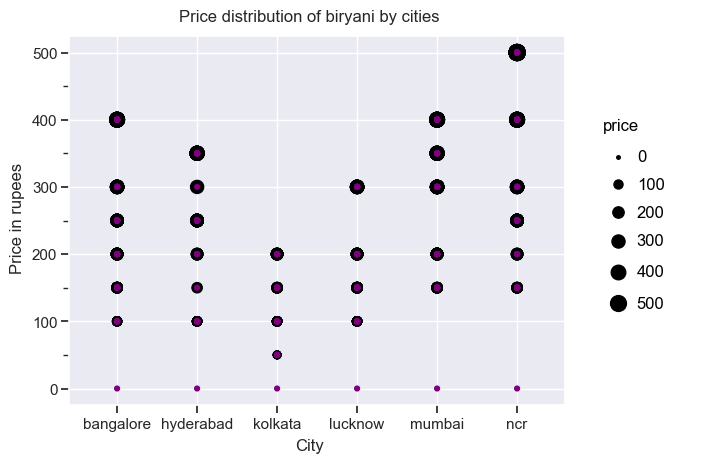

<ggplot: (688210056)>

In [177]:
from plotnine import*
display(
    ggplot(df,                   
        aes('city', 'price'))         
        + geom_point(aes(size= 'price'))
        + geom_point(color='purple')
        + theme_seaborn()
        + labs(
            title = "Price distribution of biryani by cities",
            y = "Price in rupees",
            x = "City"
        )
)   

<AxesSubplot:>

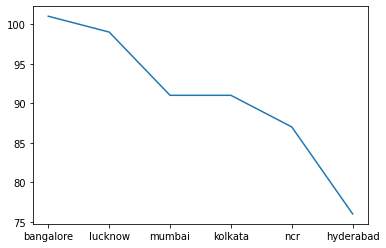

In [137]:
df.city.value_counts().plot()

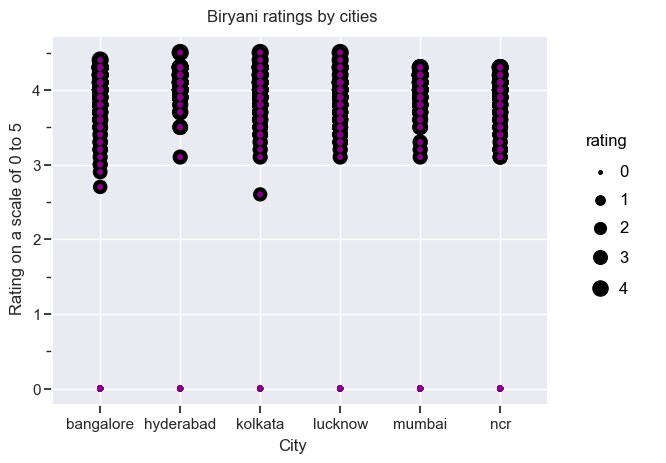

<ggplot: (692640309)>

In [181]:
display(
    ggplot(df,                   
        aes('city', 'rating'))         
        + geom_point(aes(size= 'rating'))
        + geom_point(color='purple')
        + theme_seaborn()
        + labs(
            title = "Biryani ratings by cities",
            y = "Rating on a scale of 0 to 5",
            x = "City"
        )
)   